# 第7章: 単語ベクトル

[https://nlp100.github.io/ja/ch07.html](https://nlp100.github.io/ja/ch07.html)

## 60. 単語ベクトルの読み込みと表示 

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
import gensim

model_path = './GoogleNews-vectors-negative300.bin'
w2v = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

United_States = w2v['United_States']
United_States

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

US = w2v['U.S.']
cosine_similarity(United_States.reshape(1, -1), US.reshape(1, -1))

array([[0.7310775]], dtype=float32)

## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
results = w2v.most_similar(positive=['United_States'])
for result in results:
    print(result)

('Unites_States', 0.7877248525619507)
('Untied_States', 0.7541370391845703)
('United_Sates', 0.74007248878479)
('U.S.', 0.7310774326324463)
('theUnited_States', 0.6404393911361694)
('America', 0.6178410053253174)
('UnitedStates', 0.6167312264442444)
('Europe', 0.6132988929748535)
('countries', 0.6044804453849792)
('Canada', 0.6019070148468018)


## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
results = w2v.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])
for result in results:
    print(result)

('Greece', 0.6898481249809265)
('Aristeidis_Grigoriadis', 0.5606848001480103)
('Ioannis_Drymonakos', 0.5552908778190613)
('Greeks', 0.545068621635437)
('Ioannis_Christou', 0.5400862693786621)
('Hrysopiyi_Devetzi', 0.5248444676399231)
('Heraklio', 0.5207759737968445)
('Athens_Greece', 0.516880989074707)
('Lithuania', 0.5166866183280945)
('Iraklion', 0.5146791934967041)


## 64. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
from tqdm import tqdm

with open('questions-words.txt', mode='rt', encoding='utf-8') as f:
    read_data = f.read()

analogies = {}
current_analogy = ""

for each in tqdm(read_data.split('\n')):
    sep_each = each.split(" ")
    
    if len(sep_each) == 4:
        sep_each.append(w2v.most_similar(positive=[sep_each[1], sep_each[2]], negative=[sep_each[0]], topn=1)[0])
        analogies[current_analogy].append(sep_each)
        
    elif len(sep_each) < 4 and sep_each[0] == ":":
        current_analogy = sep_each[1]
        analogies[current_analogy] = []

[analogies[key][:3] for key in analogies.keys()]

100%|██████████| 19559/19559 [55:09<00:00,  5.91it/s] 


[[['Athens', 'Greece', 'Baghdad', 'Iraq', ('Iraqi', 0.6351870894432068)],
  ['Athens',
   'Greece',
   'Bangkok',
   'Thailand',
   ('Thailand', 0.7137669324874878)],
  ['Athens', 'Greece', 'Beijing', 'China', ('China', 0.7235777974128723)]],
 [['Abuja', 'Nigeria', 'Accra', 'Ghana', ('Ghana', 0.820812463760376)],
  ['Abuja', 'Nigeria', 'Algiers', 'Algeria', ('Algeria', 0.6122236847877502)],
  ['Abuja',
   'Nigeria',
   'Amman',
   'Jordan',
   ('Saudi_Arabia', 0.5893203020095825)]],
 [['Algeria', 'dinar', 'Angola', 'kwanza', ('kwanza', 0.5409914255142212)],
  ['Algeria', 'dinar', 'Argentina', 'peso', ('peso', 0.5536293983459473)],
  ['Algeria', 'dinar', 'Armenia', 'dram', ('hryvnia', 0.5733274817466736)]],
 [['Chicago', 'Illinois', 'Houston', 'Texas', ('Texas', 0.6967872977256775)],
  ['Chicago',
   'Illinois',
   'Philadelphia',
   'Pennsylvania',
   ('Pennsylvania', 0.7848097085952759)],
  ['Chicago',
   'Illinois',
   'Phoenix',
   'Arizona',
   ('Arizona', 0.6820878386497498)]],
 [

## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [6]:
semantic_analogies = ["capital-common-countries", "capital-world", "currency", "city-in-state", "family"]
syntactic_analogies = ["gram1-adjective-to-adverb", "gram2-opposite", "gram3-comparative", 
                       "gram4-superlative", "gram5-present-participle", "gram6-nationality-adjective", 
                       "gram7-past-tense", "gram8-plural", "gram9-plural-verbs"]

semantic_acc, syntactic_acc = [], []

for semantic_analogy in semantic_analogies:
    for each in analogies[semantic_analogy]:
        if each[3] == each[4][0]:
            semantic_acc.append(1)
        else:
            semantic_acc.append(0)

for syntactic_analogy in syntactic_analogies:
    for each in analogies[syntactic_analogy]:
        if each[3] == each[4][0]:
            syntactic_acc.append(1)
        else:
            syntactic_acc.append(0)

print('Accuracy of semantic analogy : {:.3f}'.format(sum(semantic_acc) / len(semantic_acc)))
print('Accuracy of syntactic analogy: {:.3f}'.format(sum(syntactic_acc) / len(syntactic_acc)))

Accuracy of semantic analogy : 0.731
Accuracy of syntactic analogy: 0.740


## 66. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collectionの評価データ](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)をダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．


### スピアマンの順位相関

スピアマンの相関は、2つの連続変数または順位変数間の単調関係を評価します。単調関係では変数が一緒に変化しますが、一定の割合とは限りません。スピアマンの相関係数は、生データではなく各変数の順位値に基づきます。

[出典：https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/](https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/9)

In [7]:
import pandas as pd
from pandas.testing import assert_frame_equal
from scipy.stats import spearmanr

ws_353 = pd.read_csv('wordsim353/combined.csv')
cos_sims = []

for pair in ws_353.itertuples():
    word1_v, word2_v = w2v[pair[1]], w2v[pair[2]]
    similarity = cosine_similarity(word1_v.reshape(1, -1), word2_v.reshape(1, -1)).item()
    cos_sims.append([pair[1], pair[2], similarity])

cos_sim_df = pd.DataFrame(cos_sims, columns=['Word 1', 'Word 2', 'Cosine similarity'])

# assertion
assert_frame_equal(ws_353[['Word 1', 'Word 2']], cos_sim_df[['Word 1', 'Word 2']])

rank_by_human = ws_353.rank(numeric_only=True, method='first', ascending=False)['Human (mean)'].tolist()
rank_by_cossim = cos_sim_df.rank(numeric_only=True, method='first', ascending=False)['Cosine similarity'].tolist()
spearmanr(rank_by_human, rank_by_cossim)

SpearmanrResult(correlation=0.6999720642348002, pvalue=2.9311328631751965e-53)

p値は2つのデータセットが無相関であるという帰無仮説についての両側p値。有意水準1%としたとき、この帰無仮説は棄却される。

## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

> 国名の出典：[https://raw.githubusercontent.com/HirMtsd/Code/master/JISX0304/Country_list.json](https://raw.githubusercontent.com/HirMtsd/Code/master/JISX0304/Country_list.json)

In [8]:
import re
import json

country_vectors = {}
json_df = pd.read_json('https://raw.githubusercontent.com/HirMtsd/Code/master/JISX0304/Country_list.json')

for each in tqdm(json_df['countries']):
    added_vector = False
    
    # json から国名（正式名称；en_name_full / 略称：en_name_short）を変数に格納する
    if each['en_name']['full'] != None:
        en_name_full = re.sub("\s\(.+?\)|\s\[.+?\]", "", each['en_name']['full']).replace(' ', '_')
    
    # 略称名のフィールド名が en_short の場合の例外処理
    try:
        en_name_short = re.sub("\s\(.+?\)|\s\[.+?\]", "", each['en_name']['short']).replace(' ', '_')
    except KeyError:
        en_name_short = re.sub("\s\(.+?\)|\s\[.+?\]", "", each['en_name']['en_short']).replace(' ', '_')
    
    # en_name_full を使って単語ベクトルを取得する
    # en_name_full が word2vec のボキャブラリに含まれていなければ pass
    try:
        country_vectors[en_name_full] = w2v[en_name_full]
        added_vector = True
    except KeyError:
        pass
    
    # en_name_full で単語ベクトルが取得できていない場合、
    # en_name_short を使って単語ベクトルを取得する
    # en_name_short が word2vec のボキャブラリに含まれていなければ pass
    if added_vector == False:
        try:
            country_vectors[en_name_short] = w2v[en_name_short]
            added_vector = True
        except KeyError:
            pass

100%|██████████| 250/250 [00:00<00:00, 5040.41it/s]


In [11]:
import numpy as np
from sklearn.cluster import KMeans

k_to_country = {}
k = 5
X = np.array(list(country_vectors.values()))
             
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

for cluster, country in zip(kmeans.labels_, country_vectors.keys()):
    if cluster in k_to_country.keys():
        k_to_country[cluster].append(country)
    else:
        k_to_country[cluster] = [country]

for i in range(k):
    print('Cluster "{:}" countries: '.format(i))
    
    for country in k_to_country[i][:5]:
        print('\t{:}'.format(country))

country_to_k = {}
for k, countries in k_to_country.items():
    for country in countries:
        country_to_k[country] = k

Cluster "0" countries: 
	Afghanistan
	Australia
	Bahrain
	Bangladesh
	Bhutan
Cluster "1" countries: 
	Anguilla
	Antarctica
	Argentina
	Aruba
	Bahamas
Cluster "2" countries: 
	Cocos_Islands
	Cook_Islands
	Fiji
	French_Polynesia
	Guam
Cluster "3" countries: 
	Albania
	Andorra
	Armenia
	Austria
	Azerbaijan
Cluster "4" countries: 
	Algeria
	Angola
	Benin
	Botswana
	Burkina_Faso


## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

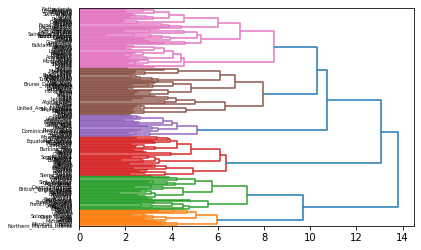

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

ward = linkage(X, method="ward", metric="euclidean")


fig = plt.figure()

dendrogram(ward, labels=list(country_vectors.keys()), orientation='right')
plt.show()

## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

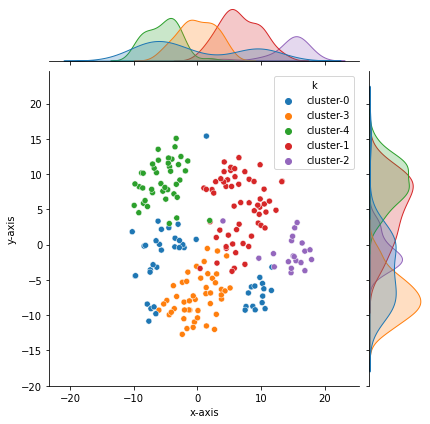

In [14]:
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)
X_embedded_df = pd.DataFrame(tsne.fit_transform(X), columns=['x-axis', 'y-axis'])
X_embedded_df['k'] = ['cluster-' + str(country_to_k[country]) for country in country_vectors.keys()]

sns.jointplot(x='x-axis', y='y-axis', hue='k', data=X_embedded_df)